In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ExifTags
import datetime as dt
import pandas as pd
from lxml import etree
%matplotlib inline

# This is where the elements of the xml (gpx) file are defined
namespace = {'def': 'http://www.topografix.com/GPX/1/1'}

['C:\\crs\\proj\\2017-07_Ontario\\tlogs\\2017-07-14_f41+chimney\\f40.gpx', 'C:\\crs\\proj\\2017-07_Ontario\\tlogs\\2017-07-14_f41+chimney\\f41.gpx', 'C:\\crs\\proj\\2017-07_Ontario\\tlogs\\2017-07-14_f41+chimney\\f42.gpx', 'C:\\crs\\proj\\2017-07_Ontario\\tlogs\\2017-07-14_f41+chimney\\f43.gpx', 'C:\\crs\\proj\\2017-07_Ontario\\tlogs\\2017-07-14_f41+chimney\\f44.gpx']
Chimney: lon[0] = -76.9077165
Chimney: lon[0] = -76.9083347
Chimney: lon[0] = -76.9083411
Chimney: lon[0] = -76.908343


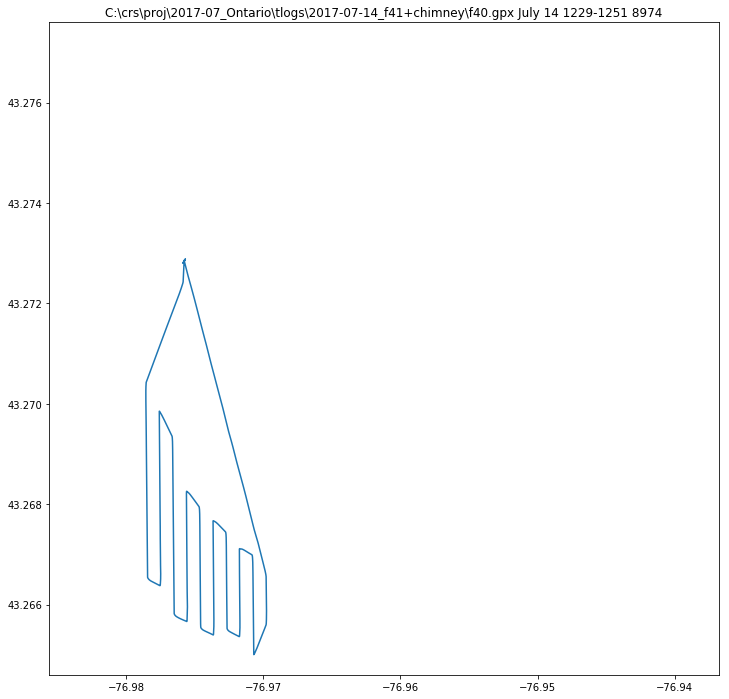

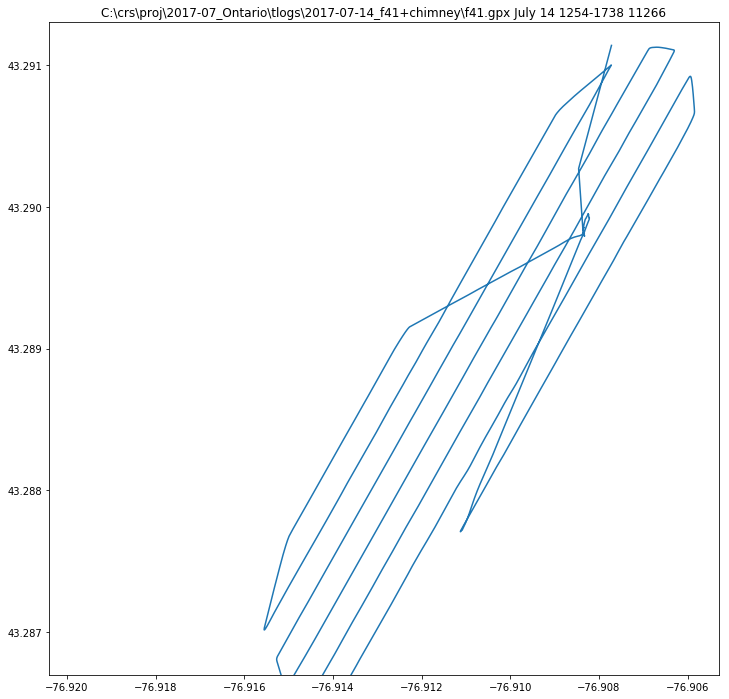

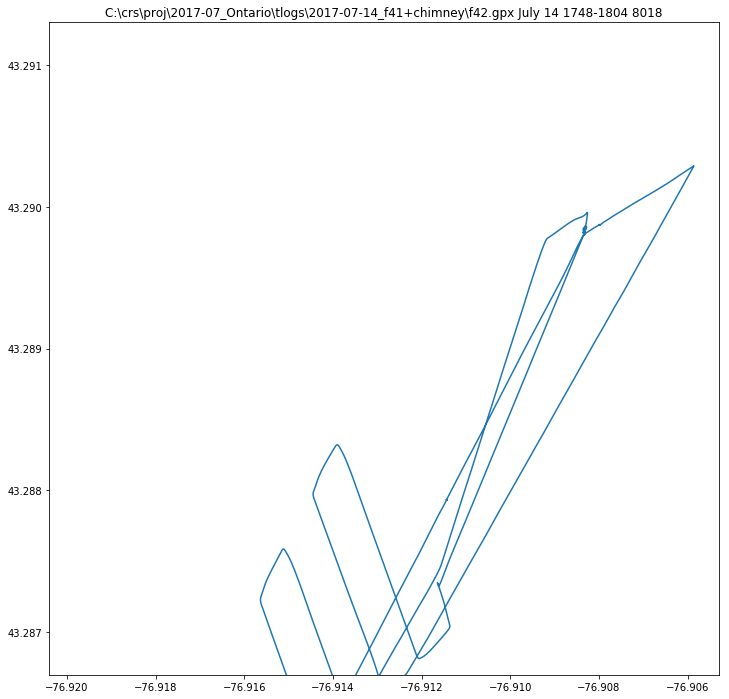

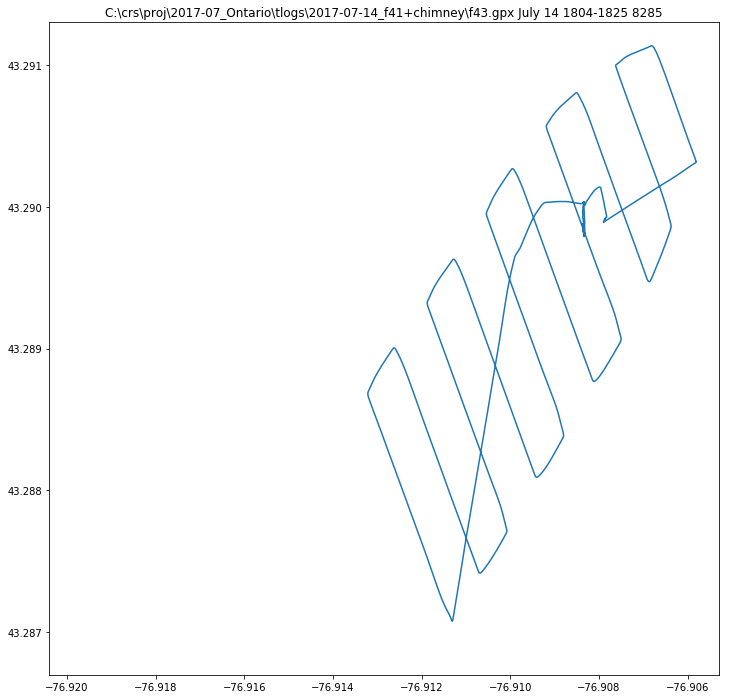

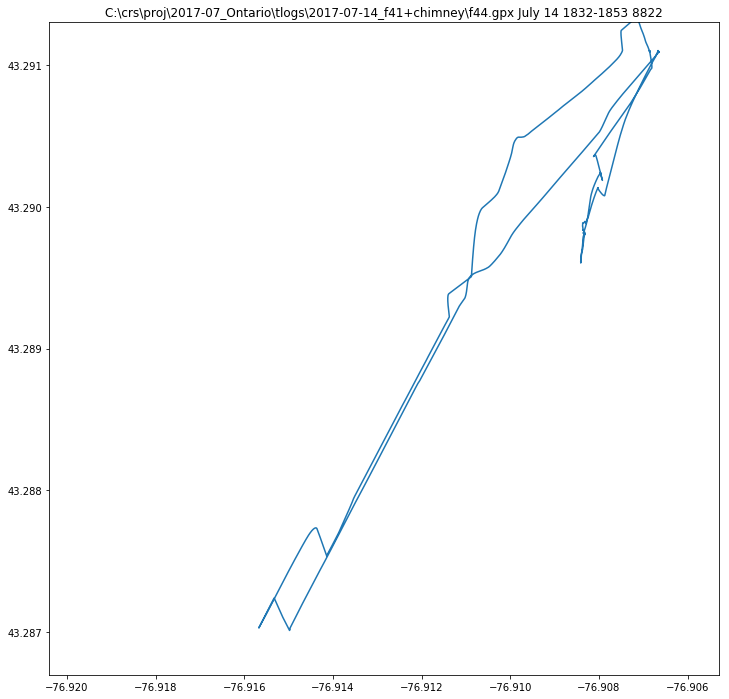

In [48]:
# get list of .gpx files the requested path (I have them in another folder at the same level)
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-12_logs'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-13_logs_a'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-13_logs_b'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-13_logs_c'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-13_logs_d'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-14_logs_a'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-14_logs_b'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-12_tlogs_tablet'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-15_logs'
#path = 'C:\\crs\\proj\\2017-07_Ontario\\tlogs\\2017-07-14_f36'
path = 'C:\\crs\\proj\\2017-07_Ontario\\tlogs\\2017-07-14_f41+chimney'


glist=[os.path.join(path,g) for g in os.listdir(path) if ( g.endswith('.gpx') or g.endswith('.GPX'))]
print(glist)

#parse the gpx file and report start and end time
#TODO - Do something more useful with the time zone info
for f in glist:
    tree = etree.parse(f)
    elist = tree.xpath('./def:trk//def:trkpt//def:time',namespaces=namespace)
    fmt = '%Y-%m-%dT%H:%M:%S-04:00' #2017-05-04T14:14:12-04:00
    time = [dt.datetime.strptime(e.text, fmt) for e in elist]
    #print(f)
    #print(time[0],time[-1], np.shape(time))
    elist = tree.xpath('./def:trk//def:trkpt',namespaces=namespace)
    lonlat = [e.values() for e in elist]
    lonlat = np.array(lonlat,dtype="float")
    lat = lonlat[:,0]
    lon = lonlat[:,1]
    #print(lon[0],lat[0],np.shape(lon))
    
    # plot title
    ts=(f+' '+time[0].strftime('%B %d %H%M')+'-'+time[-1].strftime('%H%M')+' '+'{}'.format(len(lon)))

    plt.figure(figsize=(12,12))
    plt.plot(lon[1:],lat[1:])
    plt.title(ts)
    # Duck plot boundaries
    # plt.xlim((-75.7600,-75.7480))
    # plt.ylim((36.1775,36.1866))
    
    # Sodus Point plot boundaries
    plt.xlim((-76.9856,-76.9368))
    plt.ylim((43.2646,43.2776))
    
    # Chimney Bluff plot boundaries
    if(lon[0]>=-76.9204):
        print("Chimney: lon[0] = {}".format(lon[0]))
        plt.xlim((-76.9204,-76.9053))
        plt.ylim((43.2867,43.2913))
    # Braddock plot boundaries
    if(lon[0]<=-77.717):
        print("Braddock: lon[0] = {}".format(lon[0]))
        plt.xlim((-77.7166,-77.6829))
        plt.ylim((43.2966,43.3124))
    
    plt.savefig(f+'.png')

In [3]:
print(time[0])
ts=(f+' '+time[0].strftime('%B %d %H%M')+'-'+time[-1].strftime('%H%M')+' '+'{}'.format(len(lon)))
print(ts)
tss = '{}'.format(len(lon))
print(tss)

2017-06-28 14:19:00
C:\crs\proj\2017-07_Ontario\tlogs\2017-07-10_a\solo4.gpx June 28 1419-1305 7093
7093
